In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
from tensorflow.keras.utils import load_img ,img_to_array
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [2]:
picture_size = 48
folder_path = "data/"

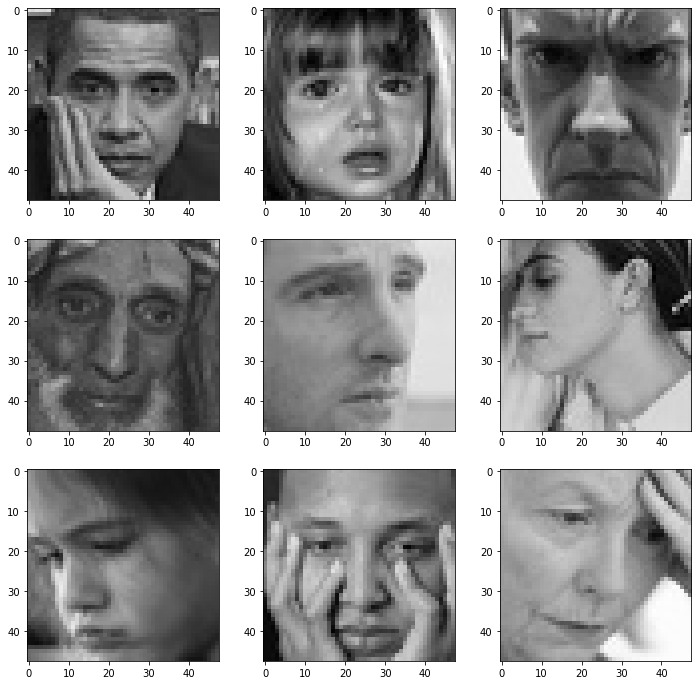

In [3]:
expression = 'stress'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [4]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)


Found 9795 images belonging to 2 classes.
Found 2480 images belonging to 2 classes.


In [5]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 2

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# SVM output layer
model.add(Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

# opt = Adam(learning_rate = 0.0001)
# model.compile(optimizer=opt,loss='hinge', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [7]:
# Part 3 - Training the CNN

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=model.fit(x = train_set, validation_data = test_set, epochs = 15)

Epoch 1/15
77/77 [==============================] - 246s 3s/step - loss: 0.9865 - accuracy: 0.5794 - val_loss: 1.1910 - val_accuracy: 0.5359
Epoch 2/15
77/77 [==============================] - 242s 3s/step - loss: 0.8642 - accuracy: 0.6313 - val_loss: 0.9141 - val_accuracy: 0.6141
Epoch 3/15
77/77 [==============================] - 240s 3s/step - loss: 0.7975 - accuracy: 0.6646 - val_loss: 0.8931 - val_accuracy: 0.6141
Epoch 4/15
77/77 [==============================] - 246s 3s/step - loss: 0.7394 - accuracy: 0.6884 - val_loss: 0.7248 - val_accuracy: 0.6754
Epoch 5/15
77/77 [==============================] - 247s 3s/step - loss: 0.6936 - accuracy: 0.7030 - val_loss: 0.7762 - val_accuracy: 0.6681
Epoch 6/15
77/77 [==============================] - 243s 3s/step - loss: 0.6510 - accuracy: 0.7184 - val_loss: 0.6889 - val_accuracy: 0.6964
Epoch 7/15
77/77 [==============================] - 240s 3s/step - loss: 0.6074 - accuracy: 0.7369 - val_loss: 0.7141 - val_accuracy: 0.6762
Epoch 8/15
77

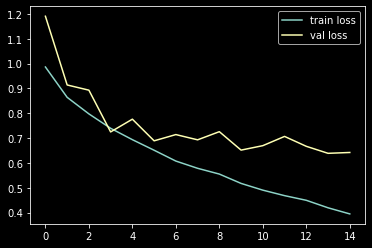

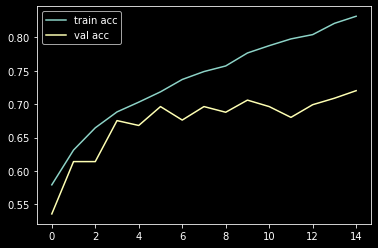

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# save model

In [10]:
# save model structure in jason file
model_json = model.to_json()
with open("emotion_modelx.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
model.save_weights('emotion_modelx.h5')